In [33]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [34]:
X,y = make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)


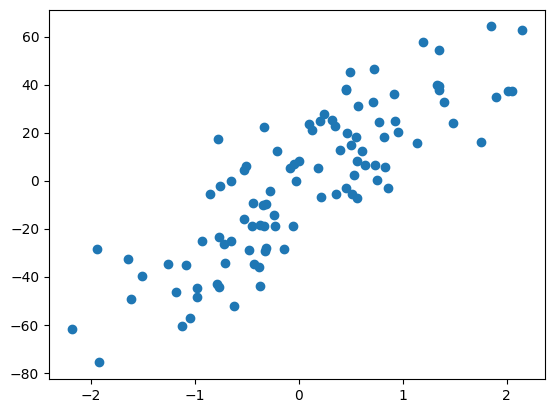

In [35]:
plt.scatter(X,y)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [40]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [41]:
class GDregression:

    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        #calculate the b using GD
        for i in range (self.epochs):
           loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b) 
           loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b) *X.ravel())
           self.b = self.b - (self.lr * loss_slope_b)
           self.m = self.m - (self.lr * loss_slope_m)
           print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b       
    
           

In [42]:
gd = GDregression(0.001,50)

In [43]:
gd.fit(X_train,y_train)

90.04629892211885 -101.74579222551124
81.45526459363266 -86.33159805246282
74.04311055612814 -73.31405765077903
67.65034931588339 -62.31925945284707
62.13866746737299 -53.03182533775812
57.388186604948714 -45.185716863687844
53.295065421356476 -38.55649030694167
49.76940295441548 -32.95477146340025
46.73340716346203 -28.22075749072971
44.119796891300396 -24.219583614929572
41.87040880112064 -20.837418214159634
39.93498408345094 -17.978171400492243
38.27011262242971 -15.560720396685232
36.83831491296171 -13.516570296741047
35.607244351591326 -11.787881665108163
34.54899460565792 -10.325807255788309
33.63949861883491 -9.089089243664636
32.8580074572265 -8.042876028669264
32.186638658597445 -7.157724128122485
31.60998503668936 -6.4087561063536
31.114776030309518 -5.774950065535027
30.689584689018417 -5.238540073731229
30.324574268511547 -4.7845101500234595
30.01127918260372 -4.400167158554662
29.742415737240734 -4.074780264475415
29.51171866615403 -3.7992765432249187
29.31380000749783 -3.

In [44]:
gd.predict(X)

array([[-22.36092777],
       [-14.61020252],
       [-15.07783741],
       [ 24.53064978],
       [  4.39746882],
       [ 21.95071003],
       [ -9.15237073],
       [  2.90750354],
       [-22.60335208],
       [-14.40608727],
       [ 54.44688608],
       [  8.88560702],
       [  3.55106062],
       [ -8.84542293],
       [-23.94450805],
       [ 10.46020244],
       [ 15.71827044],
       [  7.82374456],
       [-47.78087586],
       [ 46.95708473],
       [-24.51788921],
       [-16.71707058],
       [-28.44179006],
       [ 58.2529665 ],
       [ -8.13929374],
       [-48.4562909 ],
       [-11.83573323],
       [-11.37125581],
       [-15.85557195],
       [-17.03243073],
       [ 18.02962184],
       [ 19.26711317],
       [ 10.46928178],
       [-37.82648268],
       [-63.88823983],
       [-35.68110113],
       [  3.82284374],
       [ 35.16042552],
       [-32.91480321],
       [ 13.53247651],
       [-44.90121876],
       [ -2.36773087],
       [-10.13254944],
       [ 10

In [45]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

In [47]:
b = -120
m = 100
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
          slope_b = slope_b - 2 * (y[j] - (m * X[j]) - b)
          slope_m = slope_m - 2 * (y[j] - (m * X[j]) - b)*X[j]
          cost = cost + (y[j] - m * X[j] - b) **2

          b = b - (lr * slope_b)
          m = m - (lr * slope_m)

          all_b.append(b)
          all_m.append(m)
          all_cost.append(cost)
          

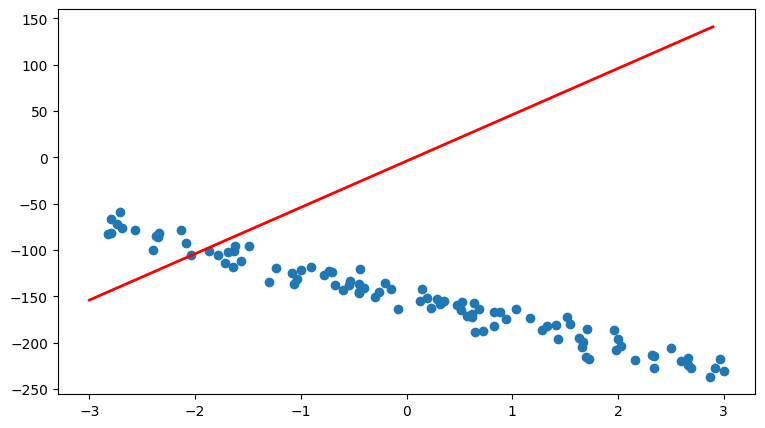

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots(figsize = (9,5))
# fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X,y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth = 2)

def update(i):
    label = 'epoch {0}' .format(i + 1)
    line.set_ydata(x_i * all_m[i] + all_b[i])
    ax.set_xlabel(label)

    anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

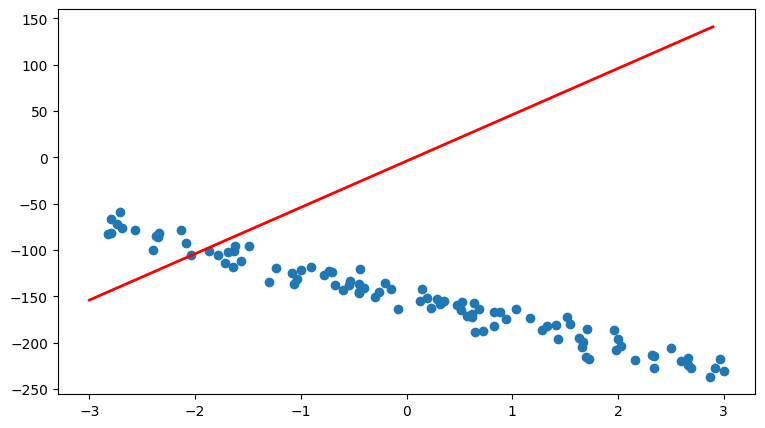

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Sample data
X = np.random.rand(100) * 6 - 3  # Random X values between -3 and 3
y = X * (-27) - 150 + np.random.randn(100) * 10  # Linear relationship with noise

# Initialize plot
fig, ax = plt.subplots(figsize=(9, 5))
x_i = np.arange(-3, 3, 0.1)
ax.scatter(X, y)
line, = ax.plot(x_i, x_i * 50 - 4, 'r-', linewidth=2)

# Example values for all_m and all_b (replace with your actual data)
all_m = np.linspace(50, -27, 100)  # Slope values over epochs
all_b = np.linspace(-4, -150, 100)  # Intercept values over epochs
epochs = len(all_m)  # Number of epochs

# Update function
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * all_m[i] + all_b[i])  # Update the line data
    ax.set_xlabel(label)  # Update the label
    return line,  # Return the updated line object

# Create animation
anim = FuncAnimation(fig, update, frames=epochs, interval=500, repeat=True)

# Display the animation
plt.show()